# ***Loan Status Dataset***

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("loan_data.csv")
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [3]:
# prompt: encode catogorical columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])


In [4]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [5]:
# Define Features (X) and Target (y) for the dataset
X = df.drop(columns=['loan_status'])  # Features: All columns except loan_status
y = df['loan_status']                 # Target: loan_status column


In [6]:
# prompt: split the dataset into training and testing dataset 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# prompt: Initialize and Train AdaBoost

# Initialize AdaBoost Classifier with a Decision Tree as the base estimator
ada_boost_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42
)

# Train the AdaBoost classifier
ada_boost_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_boost_clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost Classifier: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoost Classifier: 0.9114074074074074


In [8]:
# prompt: The model made predictions on the test set.

# ... (Your existing code) ...

# Make predictions on the test set
y_pred = ada_boost_clf.predict(X_test)

# Create a DataFrame to store the actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the first few rows of the results
print("\nPredictions on the test set:")
print(results_df.head(20))  # You can adjust the number of rows to display

# You can also analyze the results further, such as:
# - Calculating other metrics (precision, recall, F1-score)
# - Creating a confusion matrix to visualize the performance
# - Investigating specific cases where the model made incorrect predictions


Predictions on the test set:
       Actual  Predicted
37979       0          0
9911        0          0
43386       1          1
13822       0          0
44810       1          1
18495       0          0
25555       0          0
13316       1          1
12929       1          0
28374       0          0
43684       1          1
26716       0          0
1570        1          0
40273       0          0
10855       0          0
8718        0          0
21247       0          0
30423       0          0
19495       0          0
7615        0          0


In [9]:
# prompt: classification report

from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     10493
           1       0.82      0.77      0.79      3007

    accuracy                           0.91     13500
   macro avg       0.88      0.86      0.87     13500
weighted avg       0.91      0.91      0.91     13500



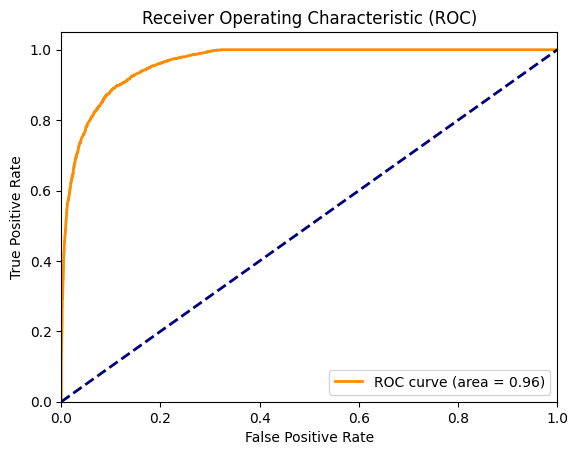

In [10]:
# prompt: plot roc

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (loan_status=1)
y_probs = ada_boost_clf.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [11]:
# prompt: apply random forest

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model's accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier: {accuracy_rf}")

# Generate the classification report for Random Forest
report_rf = classification_report(y_test, y_pred_rf)

# Print the report for Random Forest
print("Classification Report for Random Forest:\n", report_rf)

Accuracy of Random Forest Classifier: 0.9247407407407408
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.88      0.77      0.82      3007

    accuracy                           0.92     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.92      0.92      0.92     13500



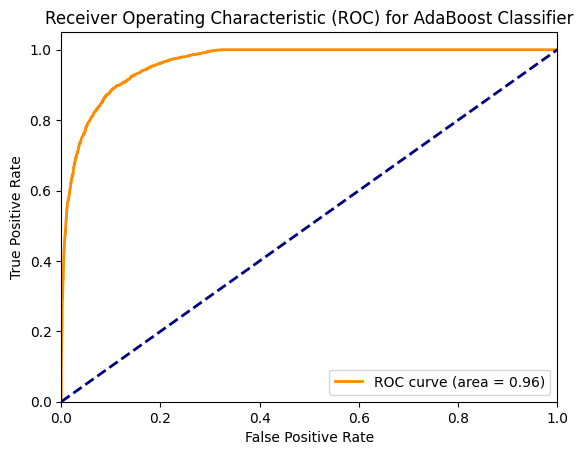

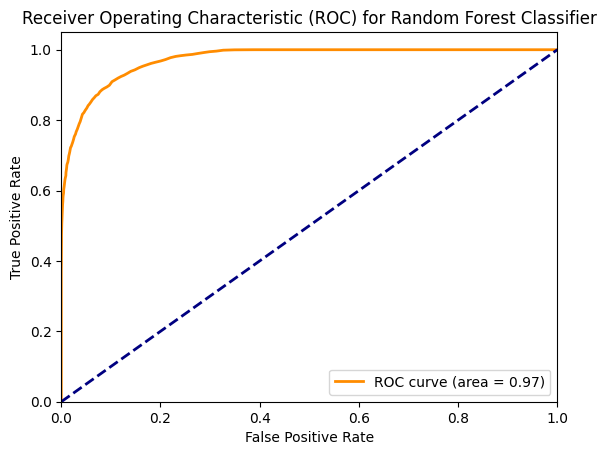

In [12]:
# prompt: plot roc

# ... (Your existing code) ...

# Get predicted probabilities for the positive class (loan_status=1)
y_probs = ada_boost_clf.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for AdaBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# ... (If you want to plot for Random Forest as well) ...

# Get predicted probabilities for the positive class (loan_status=1) for Random Forest
y_probs_rf = rf_clf.predict_proba(X_test)[:, 1]

# Compute the ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)

# Calculate the AUC (Area Under the Curve) for Random Forest
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve for Random Forest
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

In [13]:
# prompt: apply XGBoost

!pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the XGBoost classifier
xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the model's accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost Classifier: {accuracy_xgb}")

# Generate the classification report for XGBoost
report_xgb = classification_report(y_test, y_pred_xgb)

# Print the report for XGBoost
print("Classification Report for XGBoost:\n", report_xgb)

Accuracy of XGBoost Classifier: 0.9308148148148148
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     10493
           1       0.87      0.80      0.84      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.89      0.90     13500
weighted avg       0.93      0.93      0.93     13500



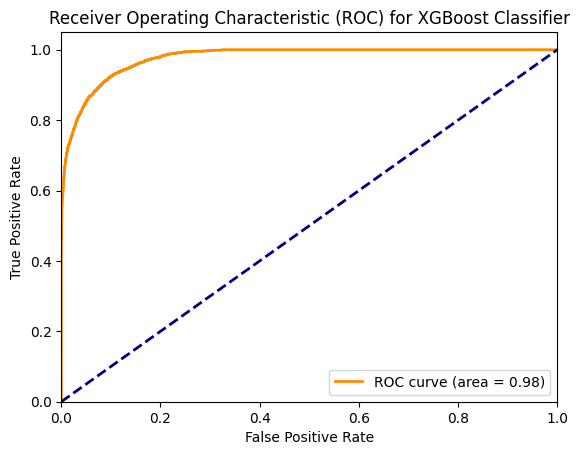

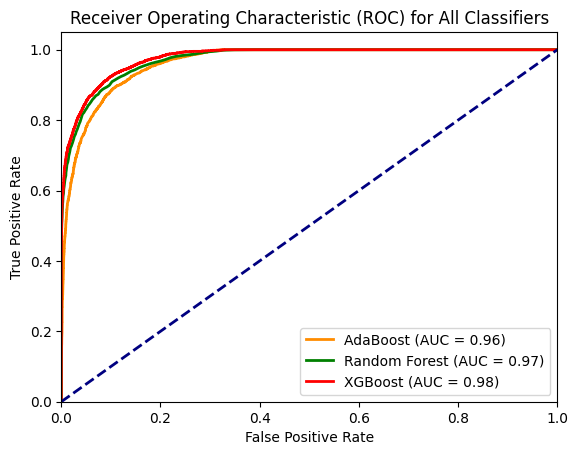

In [14]:
# prompt: plot roc

# ... (Your existing code) ...

# Get predicted probabilities for the positive class (loan_status=1) for XGBoost
y_probs_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# Compute the ROC curve for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_probs_xgb)

# Calculate the AUC (Area Under the Curve) for XGBoost
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve for XGBoost
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curves for all three models on the same plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AdaBoost (AUC = %0.2f)' % roc_auc)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for All Classifiers')
plt.legend(loc="lower right")
plt.show()

This code performs loan status prediction using machine learning models. Here's a summary:

1. **Data Loading and Preprocessing:**
   - It loads a dataset named "loan_data.csv".
   - It encodes categorical features using LabelEncoder to convert them into numerical format suitable for machine learning models.

2. **Feature and Target Definition:**
   - It defines the features (X) as all columns except "loan_status".
   - It defines the target (y) as the "loan_status" column, which represents whether a loan was approved or not.

3. **Data Splitting:**
   - The dataset is split into training and testing sets (70% for training and 30% for testing) using `train_test_split`.

4. **Model Training and Evaluation:**
   - **AdaBoost:** An AdaBoost classifier with a Decision Tree as the base estimator is trained on the training data. Its accuracy and classification report (precision, recall, F1-score) are calculated on the test data.
   - **Random Forest:** A Random Forest classifier is trained and evaluated similarly to AdaBoost.
   - **XGBoost:** An XGBoost classifier is also trained and evaluated on the test data.

5. **ROC Curve and AUC:**
   - For each of the three classifiers, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are calculated and plotted. These metrics help evaluate the model's ability to distinguish between positive (loan approved) and negative (loan not approved) classes.
   - Finally, all three ROC curves are plotted on the same graph for comparison.

**In essence, this code builds, trains, and compares three different classification models (AdaBoost, Random Forest, and XGBoost) to predict loan status based on historical loan data.** It also uses various evaluation metrics to assess the performance of each model. The ROC curve analysis helps understand the model's ability to discriminate between loan approval and rejection scenarios.
